In [22]:
#load train and test to datafr
import plotly.graph_objs as gobj
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression,Lasso
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

train = pd.read_csv("input/train.csv")
test  = pd.read_csv("input/test.csv")

In [2]:
row = train.shape[0]
column = train.shape[1]
print(row,column)

595212 59


In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
#categorize features 
featureList = train.columns.tolist()
numericList= []
categoricalList = []
binaryList = []
for f in featureList:
    if f !='target':
        if f[-3:] == 'cat':
            categoricalList.append(f)
        elif f[-3:] == 'bin':
            binaryList.append(f)
        else:
            numericList.append(f)
print ("numeric features: ",numericList)
print("\ncategorical features: ",categoricalList)
print("\nbinary features: ",binaryList)
            

numeric features:  ['id', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']

categorical features:  ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

binary features:  ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [5]:
#counting the number of fields in each column that has null values.
output = []
for c in train.columns:
    missingVal = train[train[c] == -1][c].count()
    if missingVal > 0:
        output.append(c)
        percentage = missingVal/train.shape[0]
        print('Feature {} has {} missing values ({:.2%})'.format(c, missingVal, percentage))
        

Feature ps_ind_02_cat has 216 missing values (0.04%)
Feature ps_ind_04_cat has 83 missing values (0.01%)
Feature ps_ind_05_cat has 5809 missing values (0.98%)
Feature ps_reg_03 has 107772 missing values (18.11%)
Feature ps_car_01_cat has 107 missing values (0.02%)
Feature ps_car_02_cat has 5 missing values (0.00%)
Feature ps_car_03_cat has 411231 missing values (69.09%)
Feature ps_car_05_cat has 266551 missing values (44.78%)
Feature ps_car_07_cat has 11489 missing values (1.93%)
Feature ps_car_09_cat has 569 missing values (0.10%)
Feature ps_car_11 has 5 missing values (0.00%)
Feature ps_car_12 has 1 missing values (0.00%)
Feature ps_car_14 has 42620 missing values (7.16%)


In [6]:
#data imputation and drop columns with large number of missing values
train.drop('ps_car_03_cat',inplace=True,axis = 1)
train.drop('ps_car_05_cat',inplace=True,axis = 1)
test.drop('ps_car_03_cat',inplace=True,axis = 1)
test.drop('ps_car_05_cat',inplace=True,axis = 1)
categoricalList.remove('ps_car_03_cat')
categoricalList.remove('ps_car_05_cat')
from sklearn.preprocessing import Imputer
meanImputer = Imputer(missing_values = -1,strategy = 'mean',axis = 0)
modeImputer = Imputer(missing_values = -1, strategy = 'most_frequent',axis = 0)
train['ps_car_12'] = meanImputer.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = meanImputer.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = modeImputer.fit_transform(train[['ps_car_11']]).ravel()
test['ps_car_12'] = meanImputer.fit_transform(test[['ps_car_12']]).ravel()
test['ps_car_14'] = meanImputer.fit_transform(test[['ps_car_14']]).ravel()
test['ps_car_11'] = modeImputer.fit_transform(test[['ps_car_11']]).ravel()
print(categoricalList)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


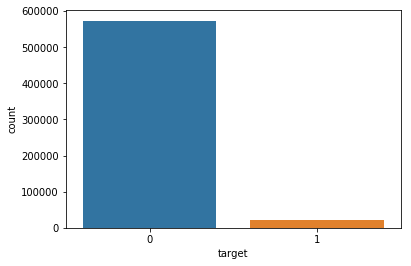

In [7]:
#plot the distribution of target variable
%matplotlib inline
sns.countplot(x="target",data=train)

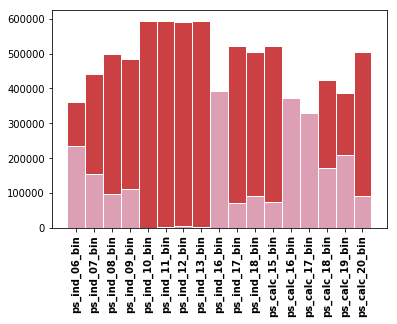

In [8]:
#Similarly, visualize the number of binary variables in other binary features
zeroList= []
oneList = []
for f in binaryList:
    zeroList.append((train[f] == 0).sum())
    oneList.append((train[f] == 1).sum())
pos = []
for i in range(len(binaryList)):
    pos.append(i)
barWidth =1
plt.bar(pos,zeroList,color= '#CB4042',edgecolor = 'white',width = barWidth)
plt.bar(pos,oneList,color= '#DC9FB4',edgecolor = 'white',width = barWidth)

plt.xticks(pos,binaryList,fontweight = 'bold',rotation =90)
plt.xlabel = ('group')
plt.show()


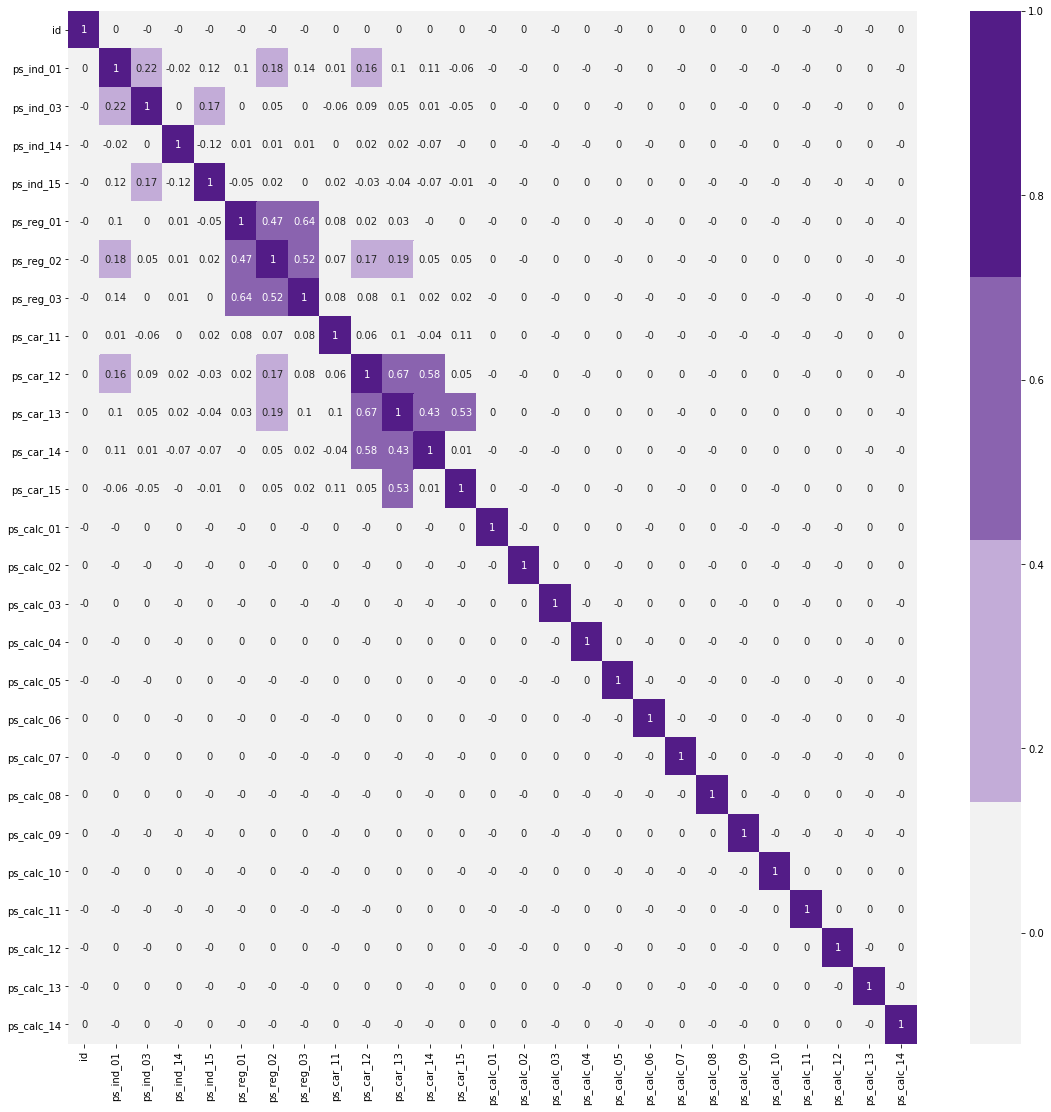

In [9]:
# explore correlation between numeric variables
corrMatrix = train[numericList].corr().round(2)
fig = plt.figure(figsize = (19,19))
sns.heatmap(corrMatrix,annot = True,center = 0,cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7),ax=plt.subplot(111))
plt.show()

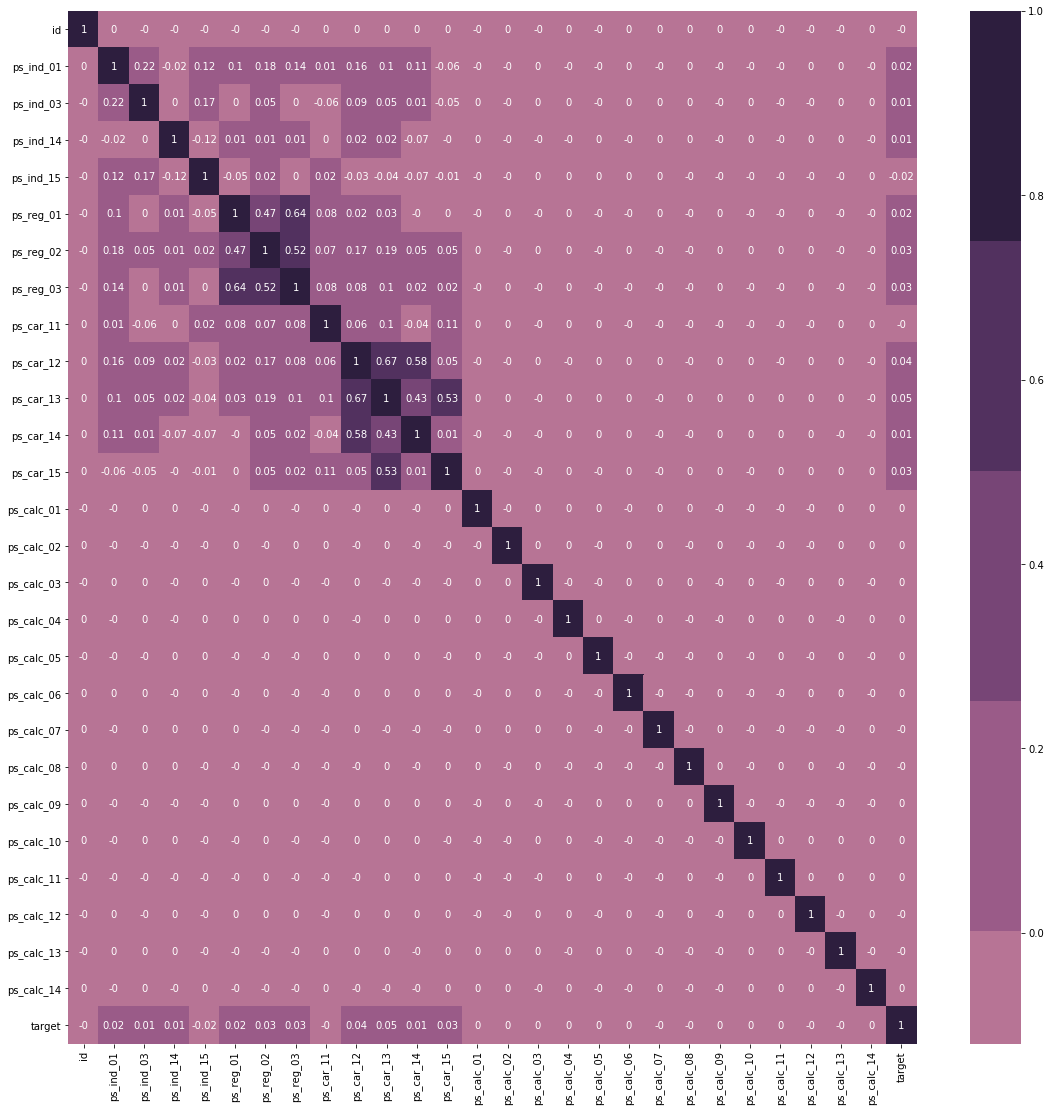

In [10]:
l = numericList
l.append('target')
corrMatrix = train[l].corr().round(2)
fig = plt.figure(figsize = (19,19))
sns.heatmap(corrMatrix,annot = True,center = 0,cmap = sns.cubehelix_palette(8),ax=plt.subplot(111))
plt.show()

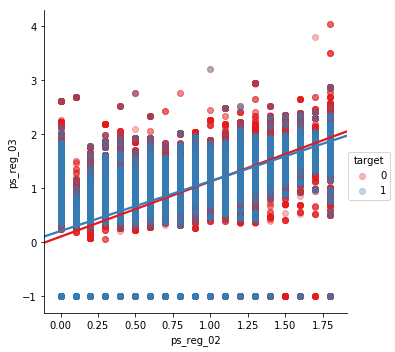

In [11]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=train, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

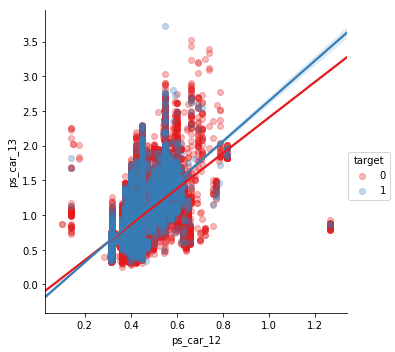

In [12]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=train, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

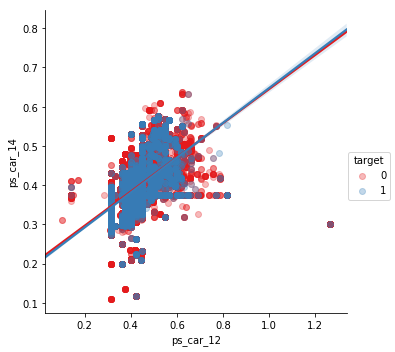

In [13]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=train, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

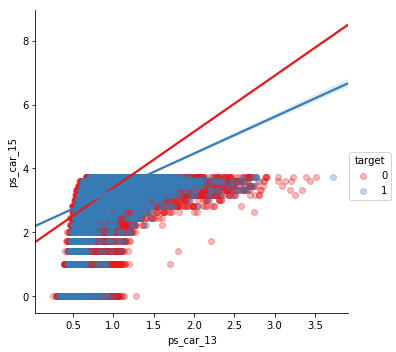

In [14]:
sns.lmplot(x='ps_car_13', y='ps_car_15', data=train, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


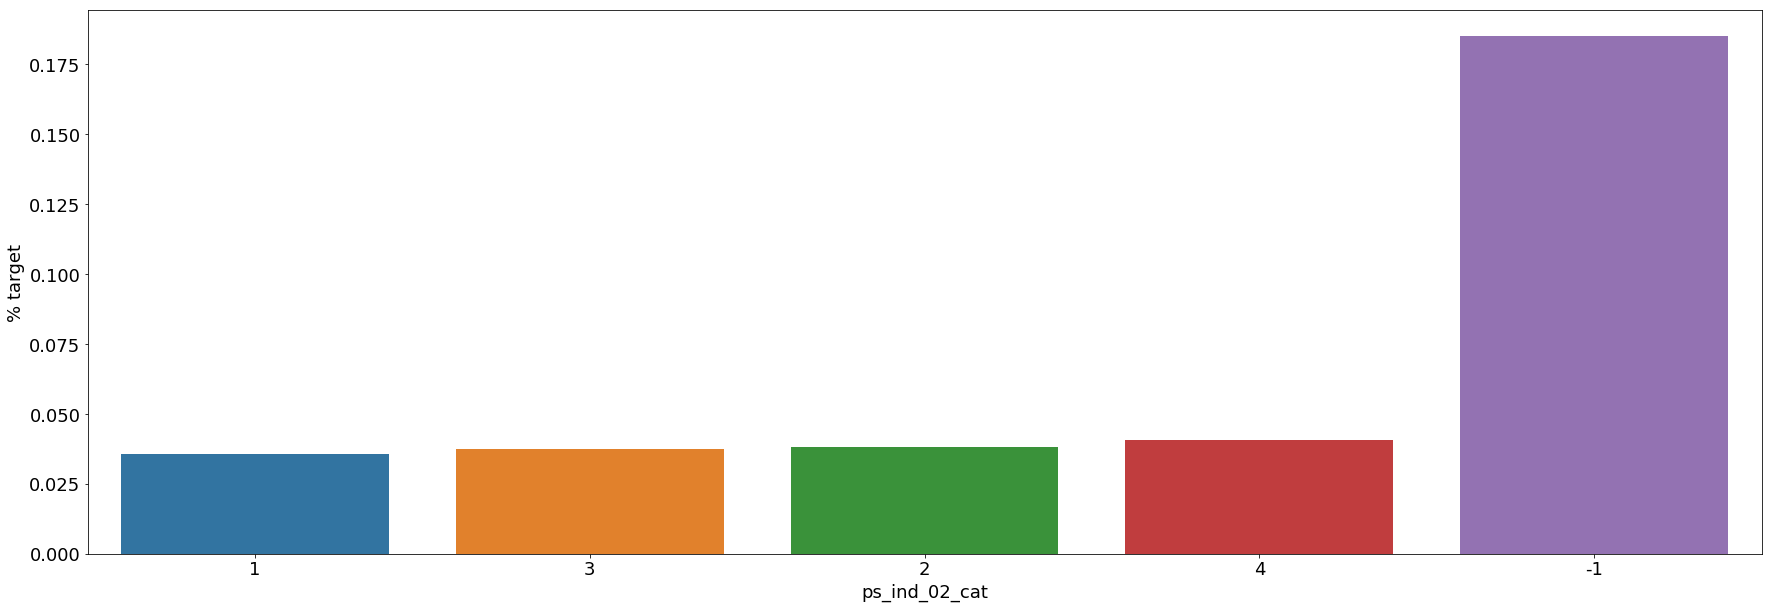

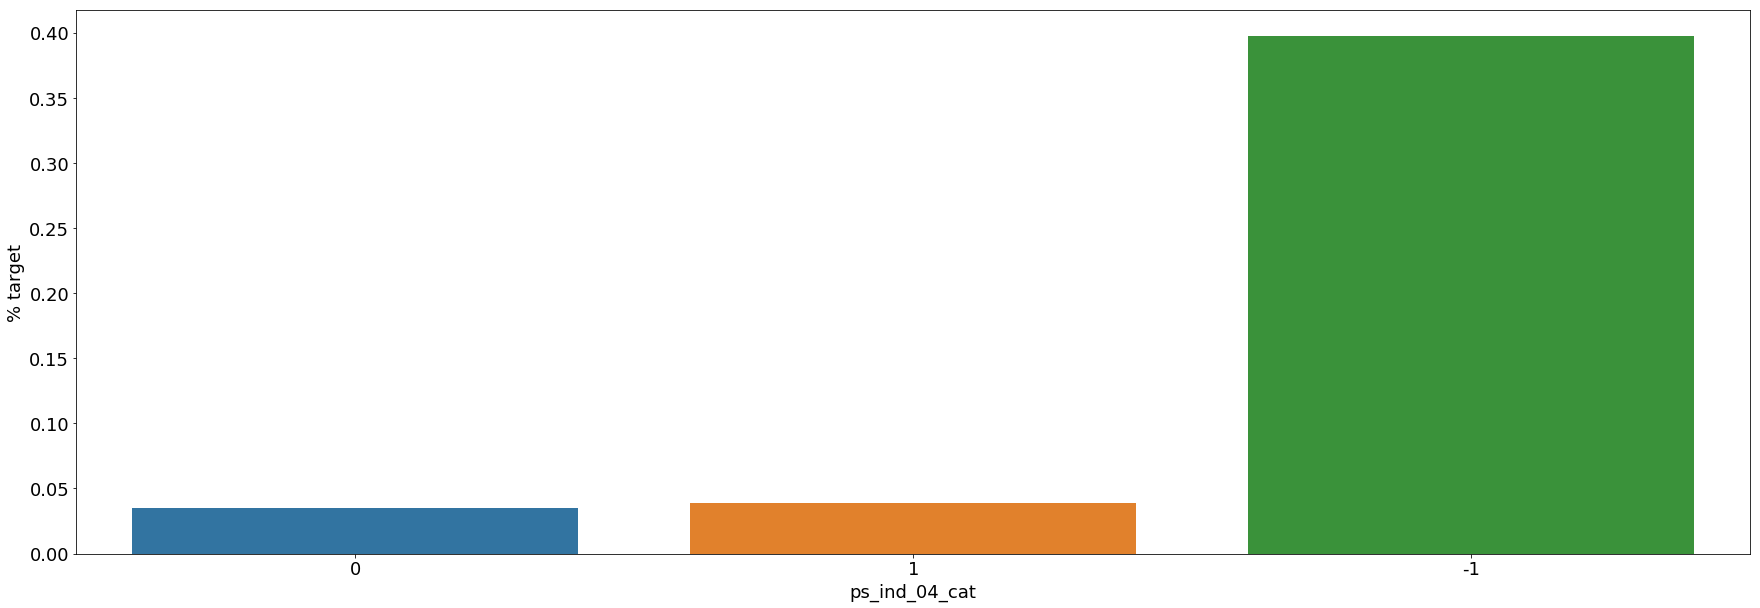

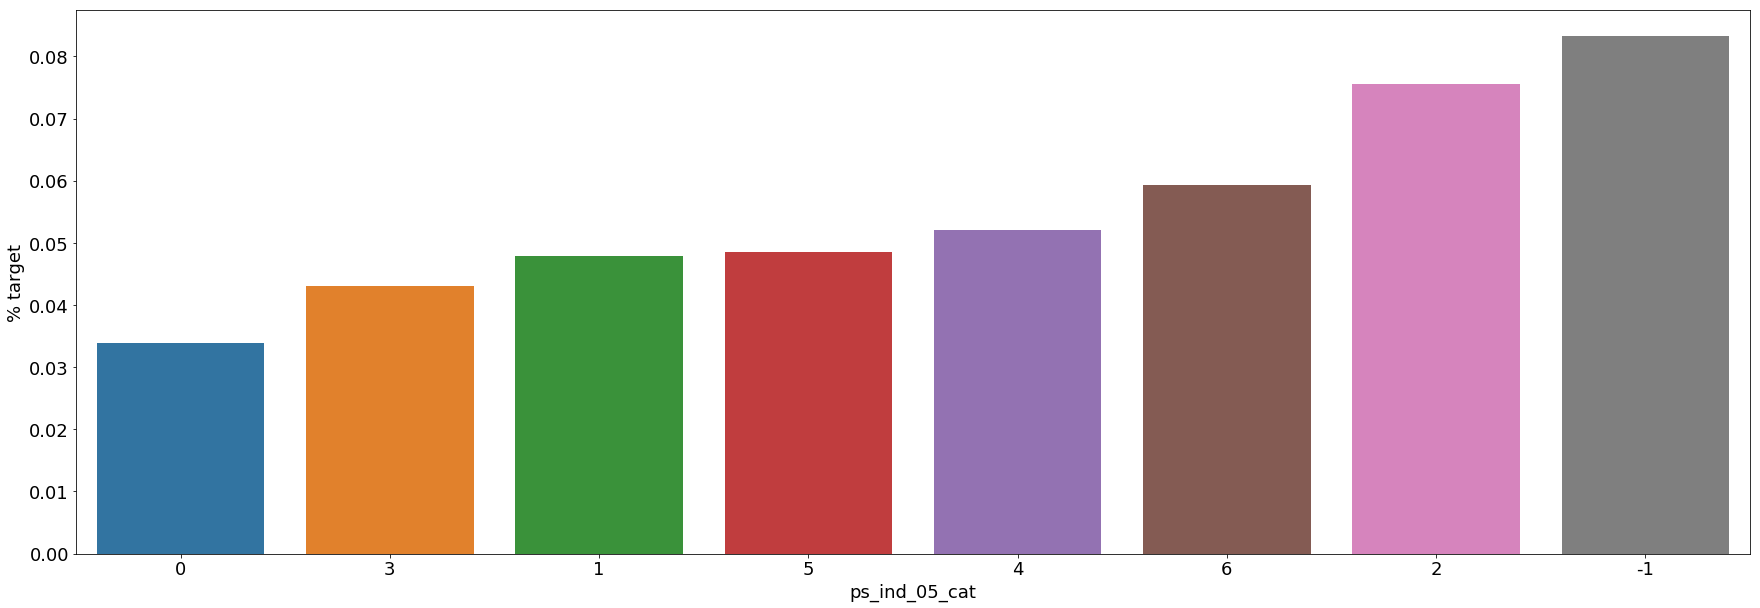

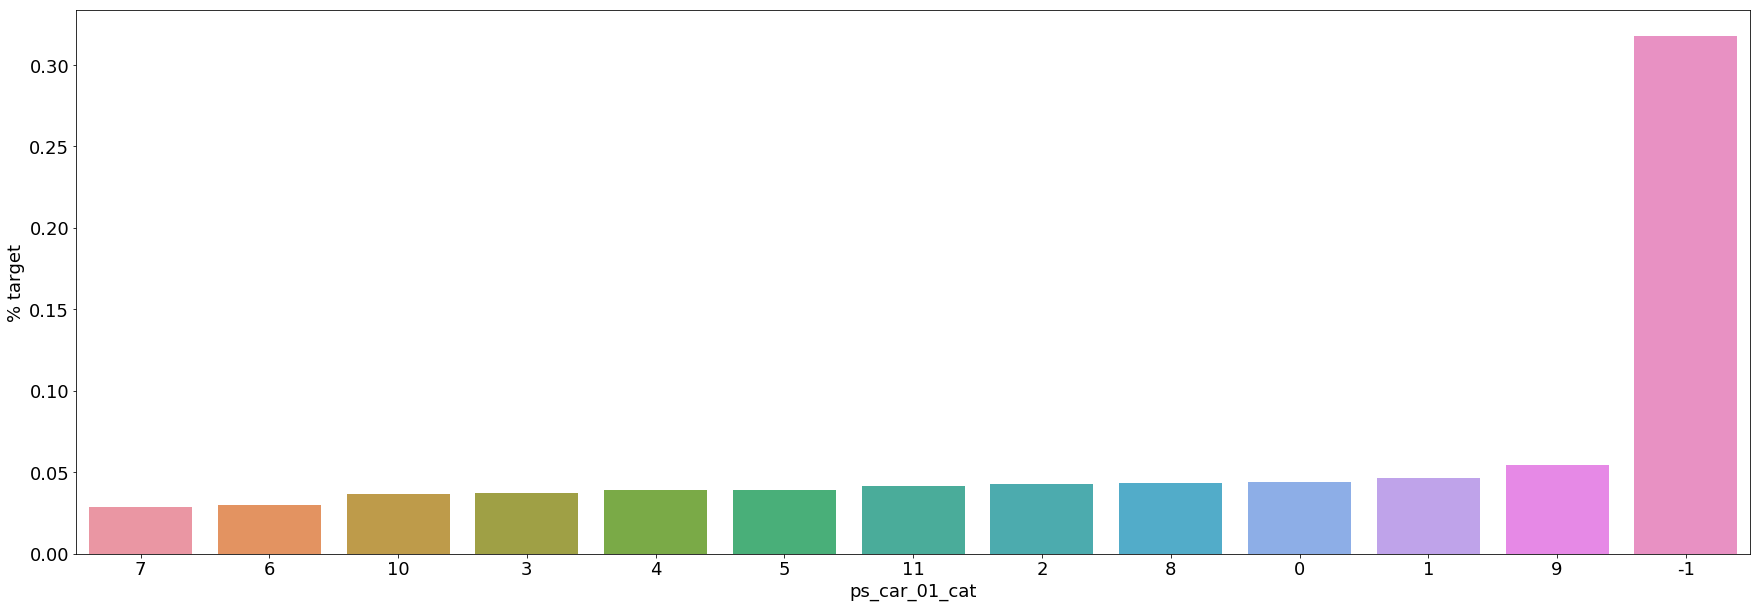

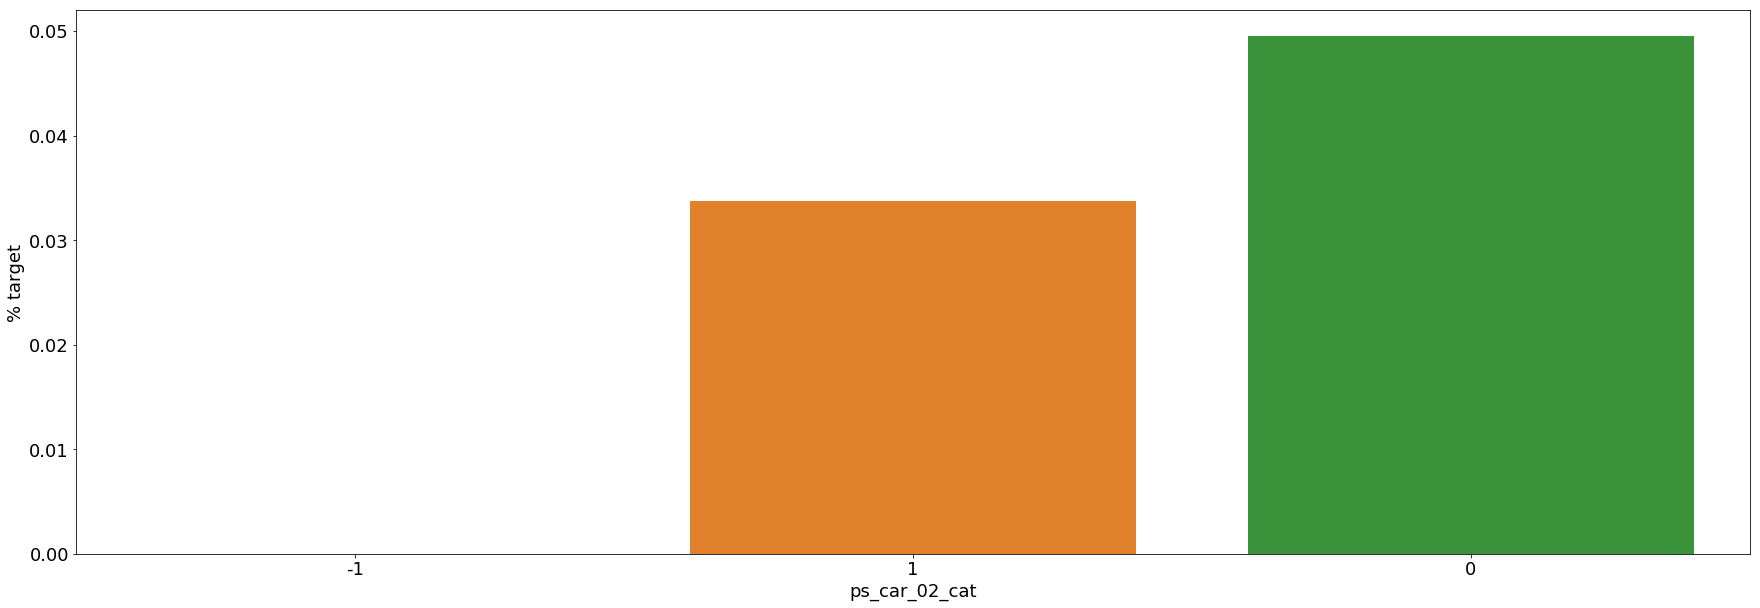

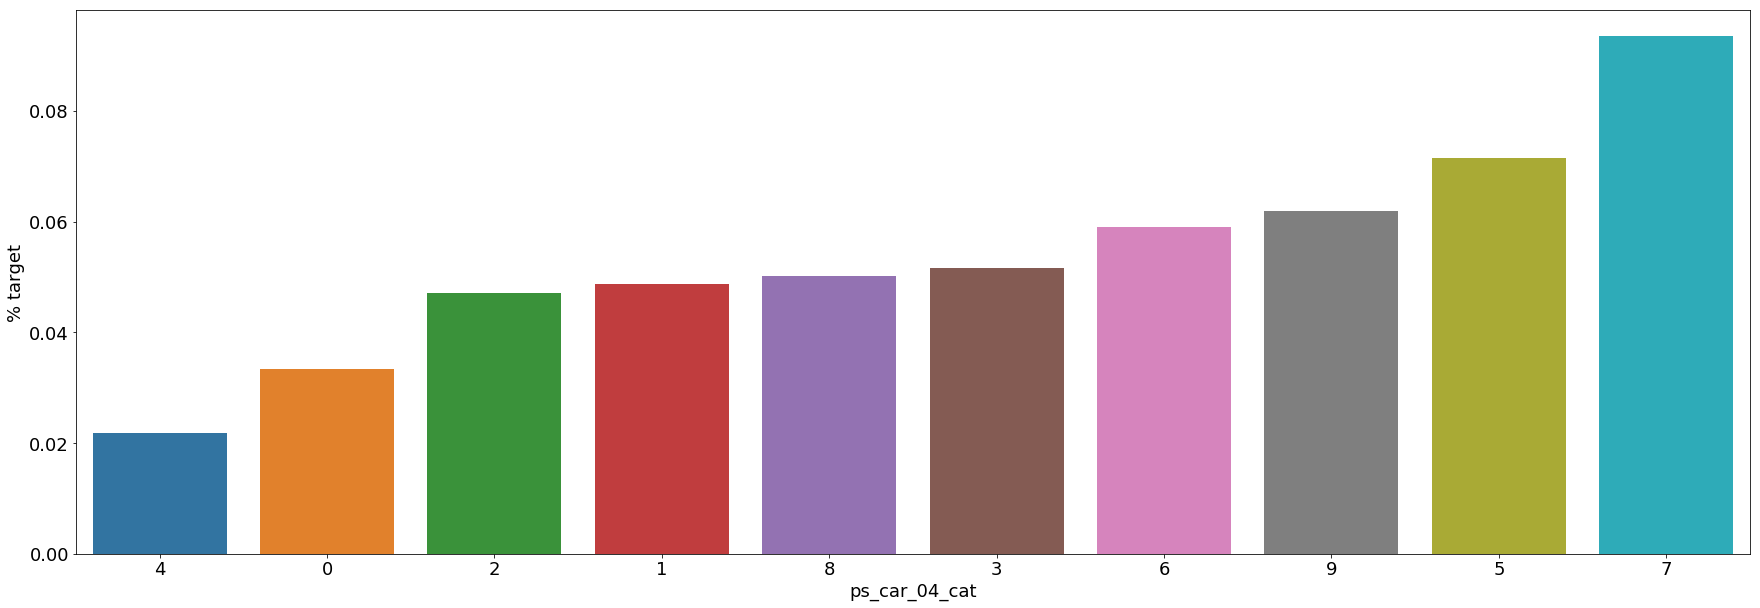

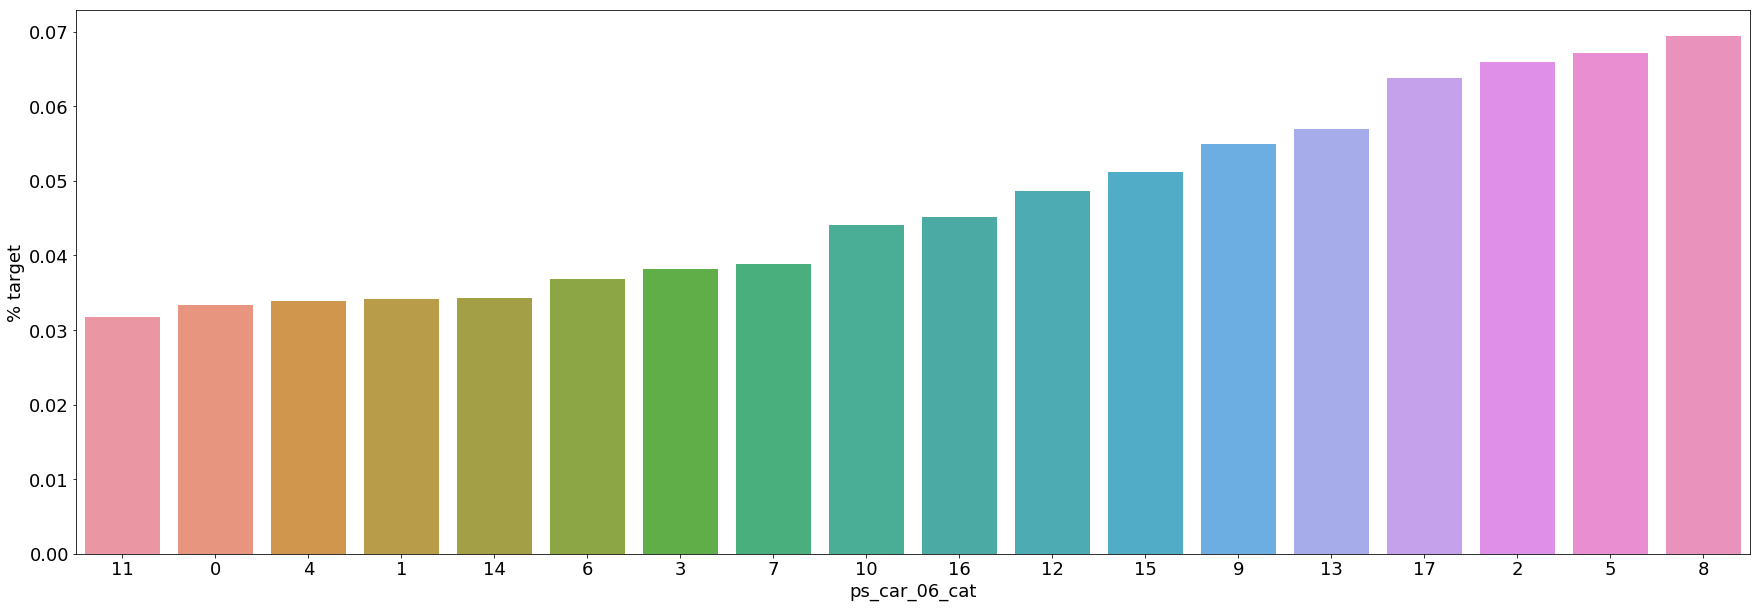

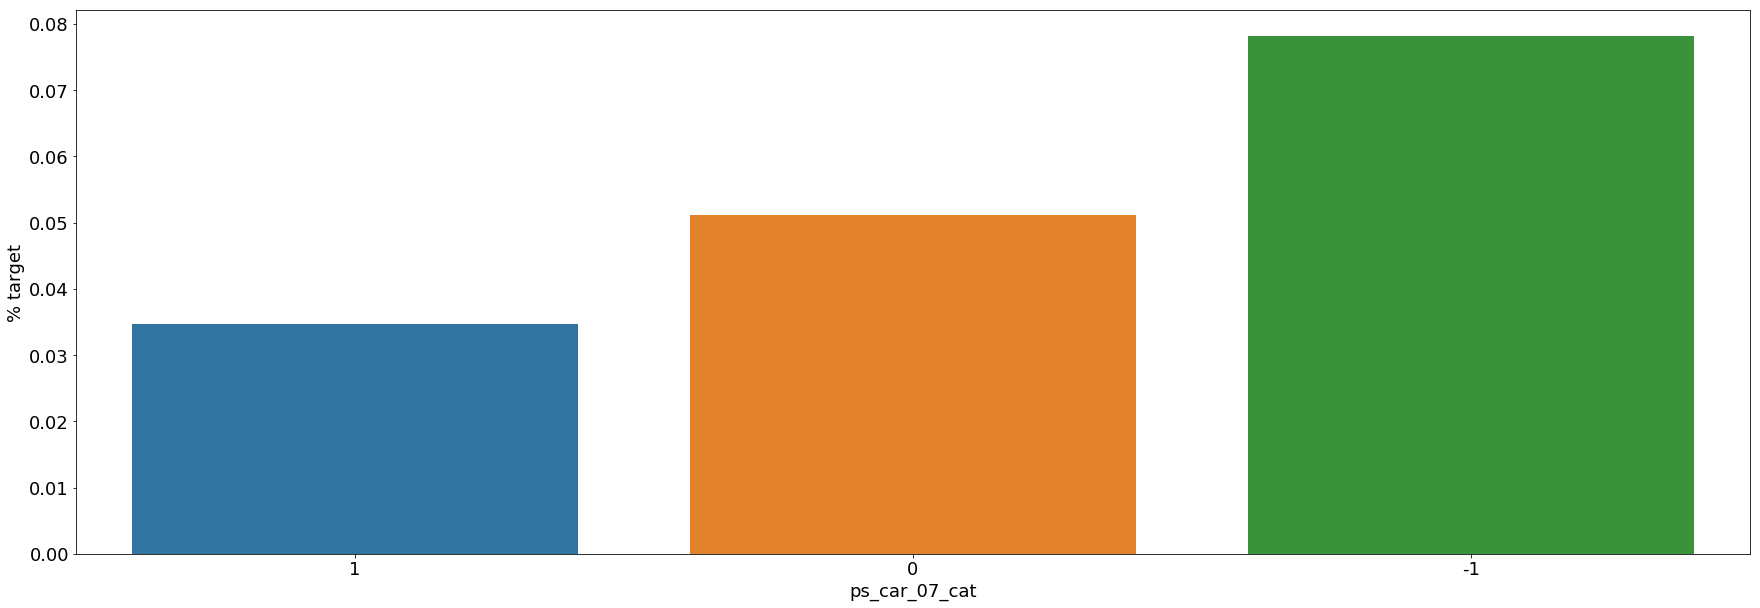

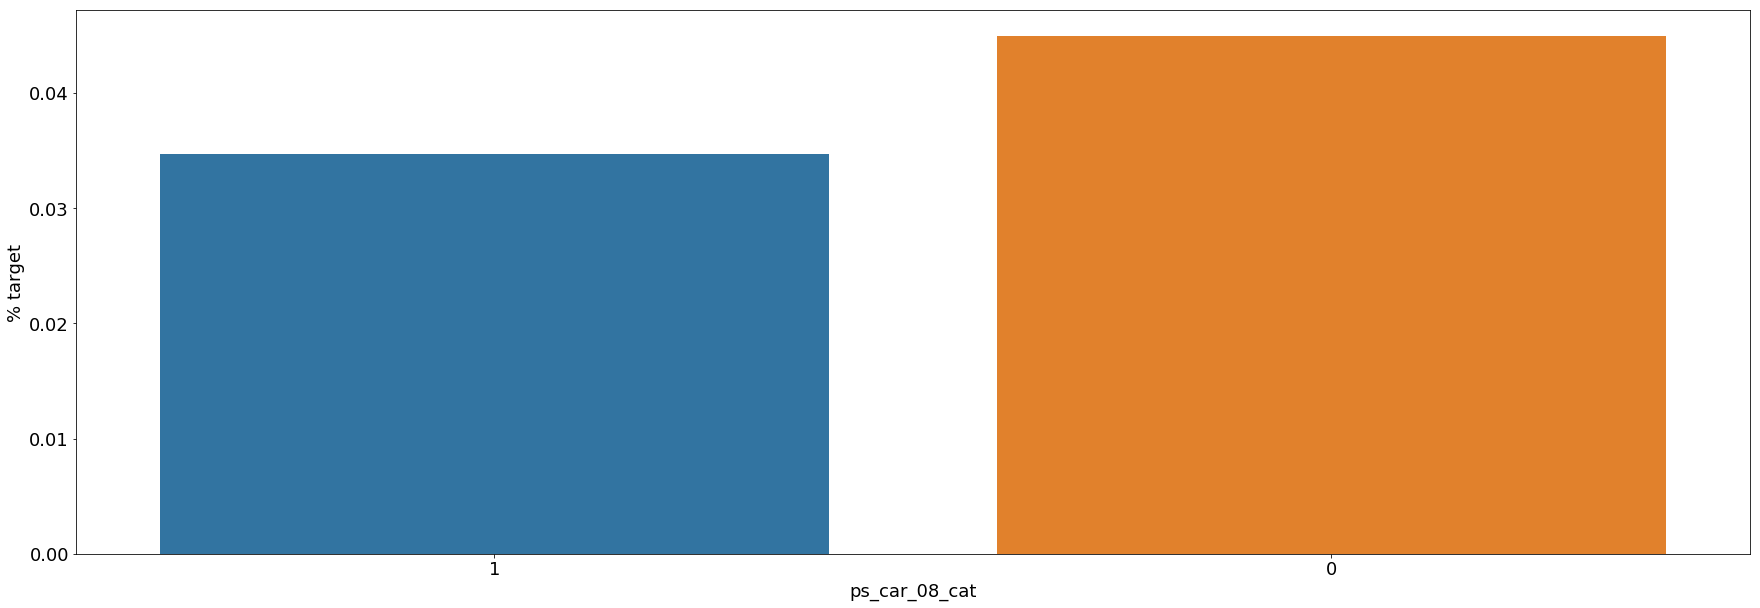

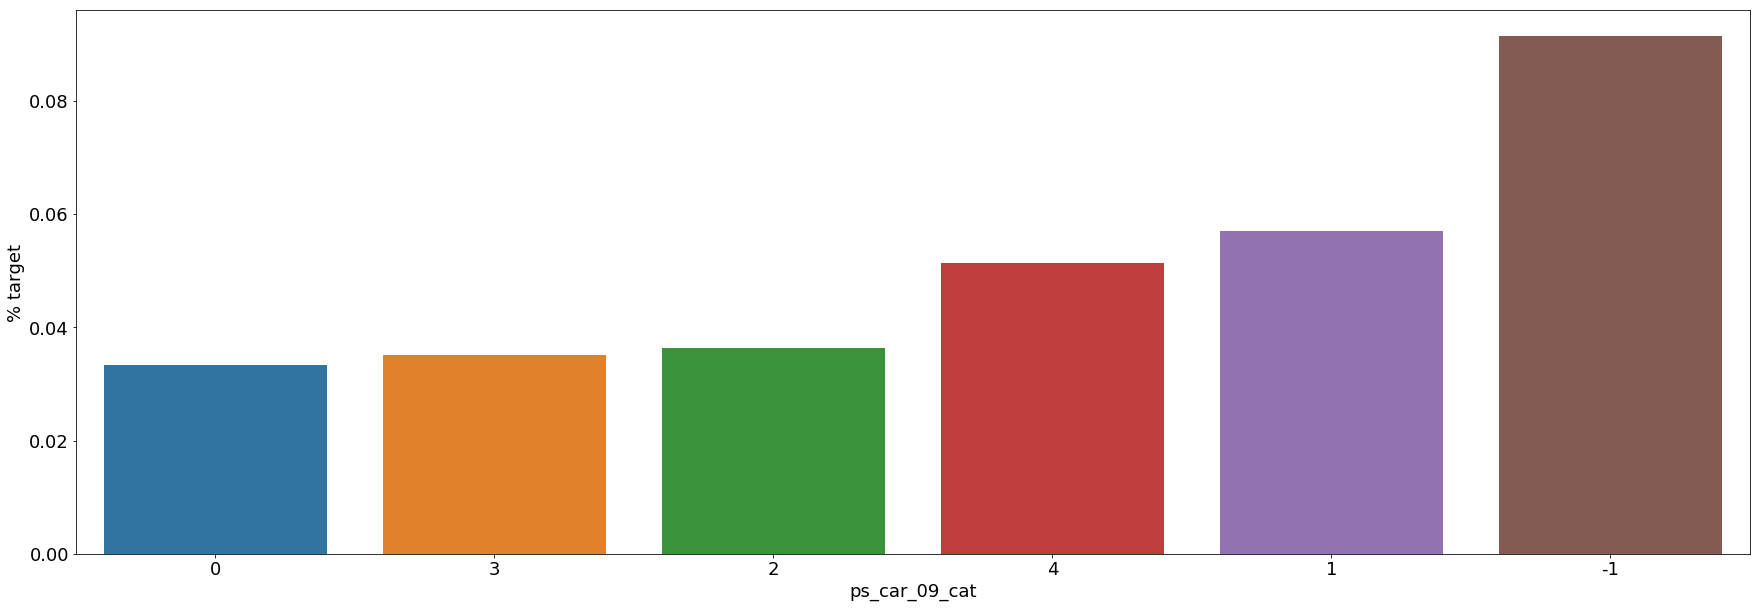

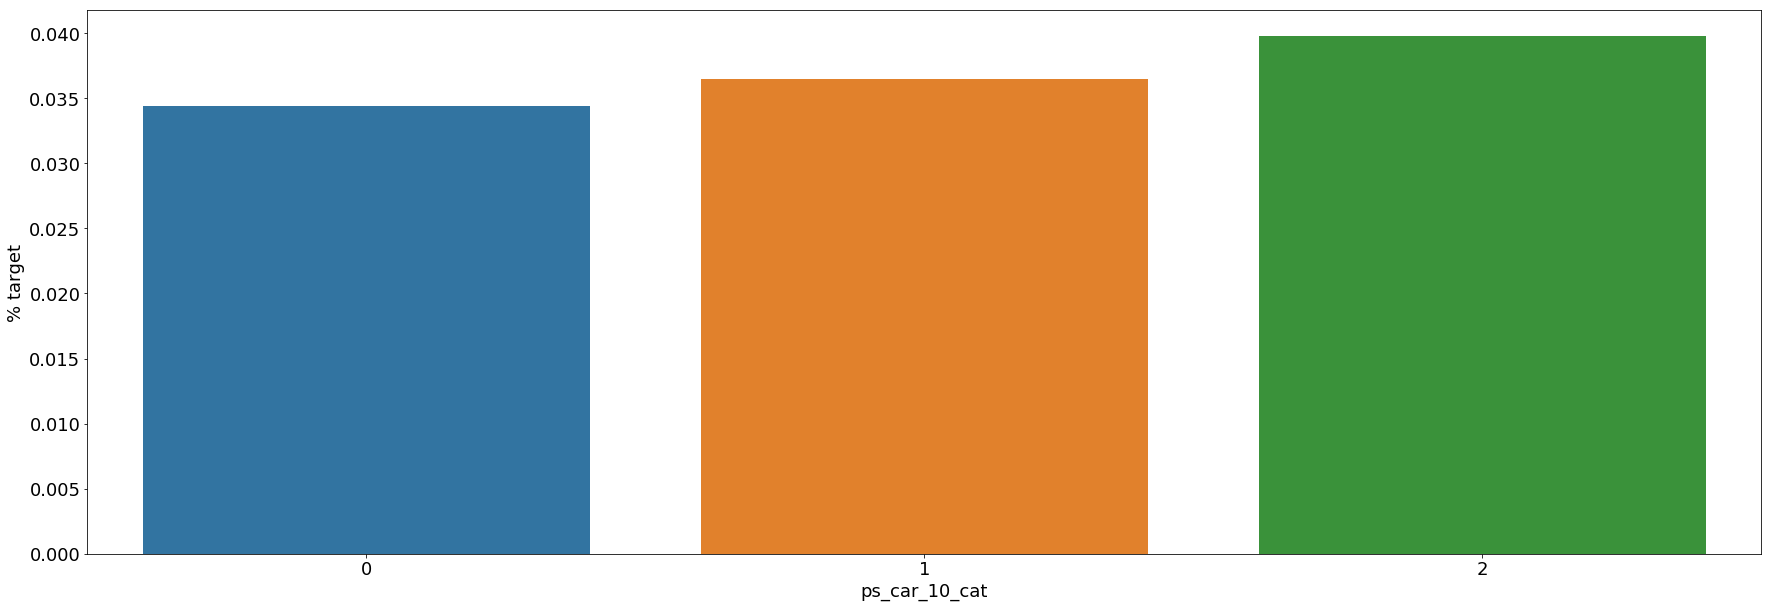

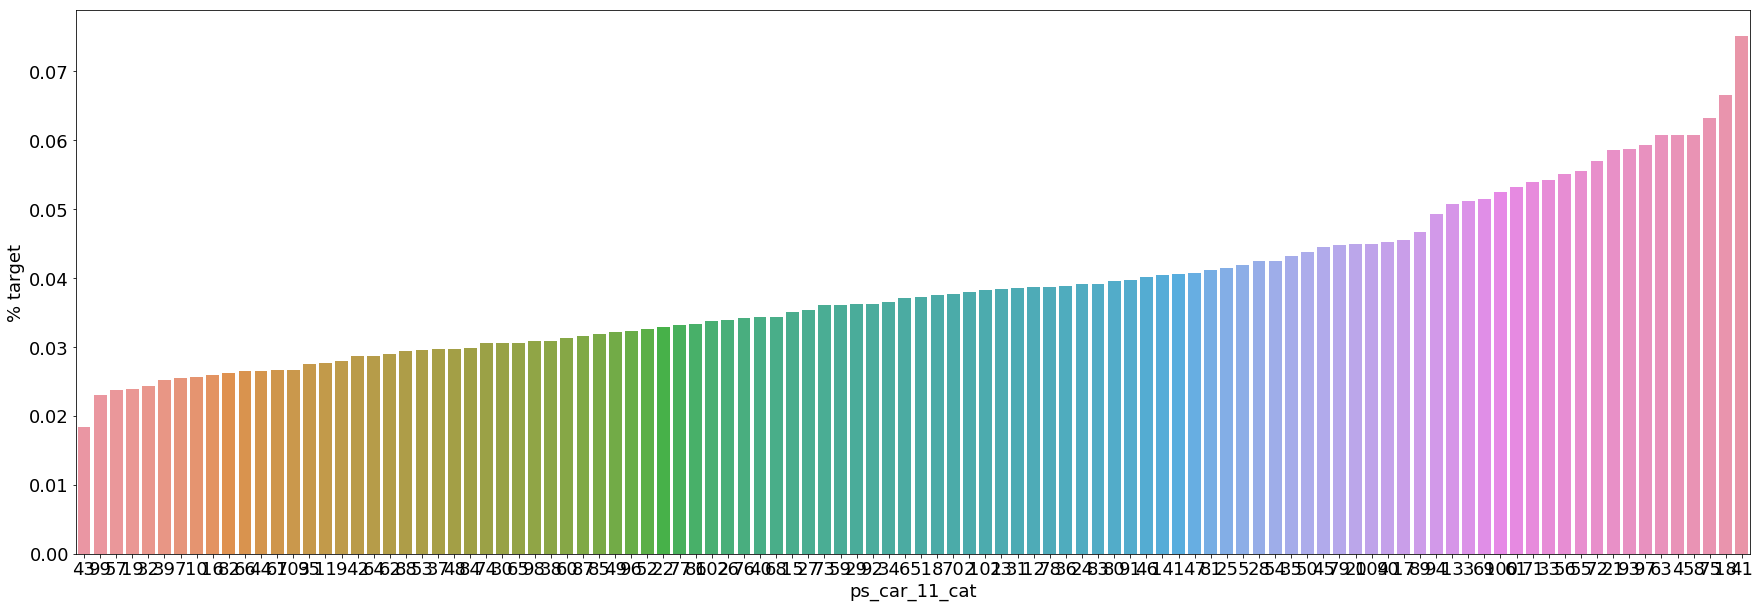

In [15]:
print (categoricalList)
for c in categoricalList:
    plt.figure()
    fig,ax = plt.subplots(figsize = (30,10))
    catPercent = train[[c,'target']].groupby([c],as_index = False).mean()
    catPercent.sort_values(by='target',ascending = True,inplace =True)
    sns.barplot(ax=ax, x=c, y='target', data=catPercent, order=catPercent[c])
    ax.set_ylabel('% target', fontsize=18)
    ax.set_xlabel(c, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()
    

In [16]:
#from the correlation plot, we figured that calc features do not correlate to any other features
#drop calc features
calc_col = train.columns[train.columns.str.startswith('ps_calc')]
train = train.drop(calc_col,axis = 1)
test = test.drop(calc_col,axis = 1)
trainX = train.drop(['target','id'],axis = 1)
trainY = train['target'].astype('category')
testX = test.drop(['id'],axis = 1)
#create dummies for categorical features
for c in categoricalList:
    dummies = pd.get_dummies(pd.Series(trainX[c]))
    trainX = pd.concat([trainX,dummies],axis = 1)
    trainX = trainX.drop([c],axis = 1)
for c in categoricalList:
    dummies = pd.get_dummies(pd.Series(testX[c]))
    testX = pd.concat([testX,dummies],axis =1)
    testX = testX.drop([c],axis = 1)

In [17]:
#default prediction where no one purchase an autoclaim in the next year
#train2 = train
#train2['PredEveryoneDenies'] = 0
#AccEveryoneDenies = len(train2[train2['target'] == train2['PredEveryoneDenies']])/len(train2.index) *100
#print(AccEveryoneDenies)

In [18]:
#dataset with RFE
X = train.drop(['target','id'],axis = 1)
y = train['target'].astype('category')
X_test = test.drop(['id'],axis = 1)
features = X.columns
logreg = LogisticRegression()
rfe = RFE(logreg,25)
rfe = rfe.fit(X,y)
dropCol = []
for i in range(0,len(features)):
    if rfe.ranking_[i] != 1:
        dropCol.append(features[i])
print(dropCol)
X = X.drop(dropCol,axis = 1)
X_test = X_test.drop(dropCol,axis = 1)
print (X.shape,X_test.shape)

['ps_ind_01', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_11_bin', 'ps_ind_15', 'ps_car_01_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_09_cat', 'ps_car_11_cat']
(595212, 25) (892816, 25)


In [19]:
cats = []
for f in X.columns.tolist():
    if f[-3:] == 'cat':
        cats.append(f)
for c in cats:
    dummies = pd.get_dummies(pd.Series(X[c]))
    X = pd.concat([X,dummies],axis = 1)
    X = X.drop([c],axis = 1)
for c in cats:
    dummies = pd.get_dummies(pd.Series(X_test[c]))
    X_test = pd.concat([X_test,dummies],axis =1)
    X_test = X_test.drop([c],axis = 1)
print(X.values.shape, X_test.values.shape)


(595212, 43) (892816, 43)


In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
seed = 45
kf = StratifiedKFold(n_splits=5,random_state=seed,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(trainX,trainY):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = trainX.loc[train_index],trainX.loc[test_index]
    ytr,yvl = trainY[train_index],trainY[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=0.001)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(testX)[:,1]
    i+=1
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))


1 of kfold 5
roc_auc_score 0.6317181627343484

2 of kfold 5
roc_auc_score 0.6272667400301758

3 of kfold 5
roc_auc_score 0.6321549272782153

4 of kfold 5
roc_auc_score 0.6335895730568567

5 of kfold 5
roc_auc_score 0.6258540734585905
Confusion matrix
 [[71561 43142]
 [ 1963  2375]]
Cv [0.6317181627343484, 0.6272667400301758, 0.6321549272782153, 0.6335895730568567, 0.6258540734585905] 
Mean cv Score 0.6301166953116374


In [26]:
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=0.001)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(X_test)[:,1]
    i+=1
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))


1 of kfold 5
roc_auc_score 0.6224629498981412

2 of kfold 5
roc_auc_score 0.6189020072338423

3 of kfold 5
roc_auc_score 0.6246076748188975

4 of kfold 5
roc_auc_score 0.6257860132004955

5 of kfold 5
roc_auc_score 0.6167708067685957
Confusion matrix
 [[72045 42658]
 [ 2029  2309]]
Cv [0.6317181627343484, 0.6272667400301758, 0.6321549272782153, 0.6335895730568567, 0.6258540734585905, 0.6224629498981412, 0.6189020072338423, 0.6246076748188975, 0.6257860132004955, 0.6167708067685957] 
Mean cv Score 0.6259112928478159
